In [19]:
import numpy as np 
import matplotlib.pyplot as plt
from typing import List, Tuple
plt.style.use(["science", "notebook", "grid"])

Lagrange interpolation is a form of polynomial interpolation that, for a given set of $n$ distinct data points, constructs a polynomial of degree $n-1$ that exactly passes through these points. It is one of the several methods used for polynomial interpolation, with the advantage of being relatively straightforward to understand and implement.

### Theory of Lagrange Interpolation

The fundamental idea behind Lagrange interpolation is to construct a polynomial that fits exactly through a given set of data points $(x_0, y_0), (x_1, y_1), ..., (x_{n-1}, y_{n-1})$. This is accomplished by combining $n$ Lagrange basis polynomials, $L_j(x)$, each of which is constructed to be 1 at one specific data point $x_j$ and 0 at all other data points. The interpolating polynomial $P(x)$ is then a linear combination of these basis polynomials, weighted by the corresponding $y$ values of the data points.

#### Lagrange Basis Polynomials

The $j$-th Lagrange basis polynomial, $L_j(x)$, for $n$ data points is defined as:

$$ L_j(x) = \prod_{\substack{i, j = 0 \\ i \neq j}}^{n-1} \frac{x - x_i}{x_j - x_i} $$

where $i$ and $j$ range from 0 to $n-1$, and $i \neq j$. This product ensures that $L_j(x)$ is 1 at $x = x_j$ and 0 at all other $x_i$ points.

#### The Lagrange Interpolating Polynomial

The Lagrange interpolating polynomial $P(x)$ is then given by the sum:

$$ P(x) = \sum_{j=0}^{n-1} y_j L_j(x) $$

where $y_j$ is the $y$-value corresponding to $x_j$.

### Advantages

- **Simplicity**: The method does not require solving a system of linear equations or computing divided differences, unlike some other interpolation methods.
- **Flexibility**: It can interpolate any number of points without changing the form of the interpolation function.

### Disadvantages

- **Efficiency**: It can be computationally expensive for a large number of points due to the need to compute products and sums over all points for each evaluation.
- **Numerical Stability**: The method can suffer from numerical instability when interpolating over many points, leading to oscillations in the polynomial.

### Pseudocode

The following pseudocode outlines the steps to compute the Lagrange interpolating polynomial and evaluate it at a given point $x$:

```
function LagrangeInterpolation(X, Y, target)
    // X and Y are arrays of x and y coordinates of data points.
    // target is the point where the polynomial is to be evaluated.
    n = length(X)
    result = 0

    for j from 0 to n-1 do
        term = Y[j]
        for i from 0 to n-1 do
            if i != j then
                term = term * (target - X[i]) / (X[j] - X[i])
            end if
        end for
        result = result + term
    end for

    return result
end function
```

### Usage

Lagrange interpolation is particularly useful for fitting polynomials to small sets of data points or in situations where the data points change dynamically, as adding or removing a point requires recomputing the entire polynomial. It's commonly used in numerical analysis, computer graphics for curve fitting, and other areas where polynomial interpolation is required.

In [20]:
def lagrange_interpolation(x_points, y_points, target):
    """
    Calculate the value of a Lagrange interpolating polynomial for a given target x-value.

    Args:
        x_points (List[float]): The x-coordinates of the data points.
        y_points (List[float]): The y-coordinates of the data points.
        target (float): The x-value at which to evaluate the interpolating polynomial.

    Returns:
        float: The estimated y-value of the interpolating polynomial at the target x-value.

    Raises:
        ValueError: If the length of x_points does not match the length of y_points.
        ValueError: If there are duplicate x_points, which would result in division by zero.

    Example:
        >>> x_points = [1, 2, 4]
        >>> y_points = [1, 4, 16]
        >>> target = 3
        >>> print(lagrange_interpolation(x_points, y_points, target))
        9.0
    """
    # Ensure the input lists have the same length
    if len(x_points) != len(y_points):
        raise ValueError("x_points and y_points must have the same length.")

    # Check for duplicate x_points, which are not allowed in Lagrange interpolation
    if len(x_points) != len(set(x_points)):
        raise ValueError("x_points cannot contain duplicate values.")

    # Initialize the result of the interpolation
    result = 0.0

    # Iterate over all points to construct the Lagrange polynomial and evaluate it at the target
    for idx1, x_pt1 in enumerate(x_points):
        # Start with the current y_point; it will be multiplied by the Lagrange basis polynomial
        term = y_points[idx1]

        # Construct the Lagrange basis polynomial for the current point
        for idx2, x_pt2 in enumerate(x_points):
            if idx2 != idx1:  # Avoid division by zero by ensuring we don't include the current point in the product
                term *= (target - x_pt2) / (x_pt1 - x_pt2)

        # Add the term to the result
        result += term

    return result

In [23]:
x = np.array([1.5, 3, 6])
y = np.array([-0.25, 2, 20])

x_target = 4
y_target = lagrange_interpolation(x, y, x_target)

Text(0, 0.5, 'y')

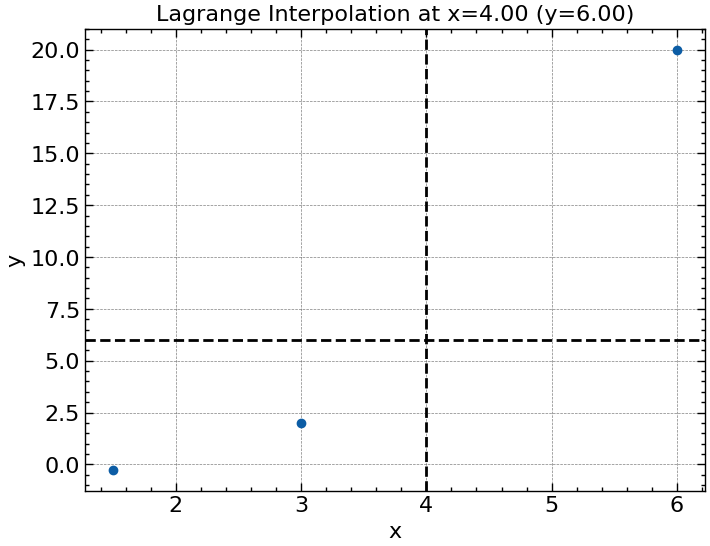

In [24]:
plt.scatter(x, y)
plt.axvline(x_target, color="black", linestyle="--")
plt.axhline(y_target, color="black", linestyle="--")
plt.title(f"Lagrange Interpolation at x={x_target:.2f} (y={y_target:.2f})")
plt.xlabel("x")
plt.ylabel("y")